In [9]:
from code_.thinkbayes import Suite, Pmf
import numpy as np
import matplotlib.pyplot as plt

### Locomotive problem
A railroad numbers its locomotives in order 1..N. One day you see a locomotive with
the number 60. Estimate how many locomotives the railroad has.

1. What did we know about N before we saw the data?
2. For any given value of N, what is the likelihood of seeing the data (a locomotive
with number 60)?

Presented two solutions:
 * naive - uniform distribution and point estimate of MMSE
 * improved by lognormal distribution + confidence interval

**Naive Solution**

In [18]:
class TrainProblem(Suite):
    def __init__(self, hypos):
        Suite.__init__(self)
        for H in hypos:
            self.Set(H, 1)
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [7]:
hypos = list(range(1, 1001, 1))
suite = TrainProblem(hypos)
suite.Update(60)

0.0028222671142652746

In [14]:
print(f'Max-likelihood estimate: {suite.MaximumLikelihood()}\n MMSE estimate: {suite.Mean()}')

Max-likelihood estimate: 60
 MMSE estimate: 333.41989326371095


In [10]:
x = []
y = []
for h, prob in suite.Items():
    x.append(h)
    y.append(prob)

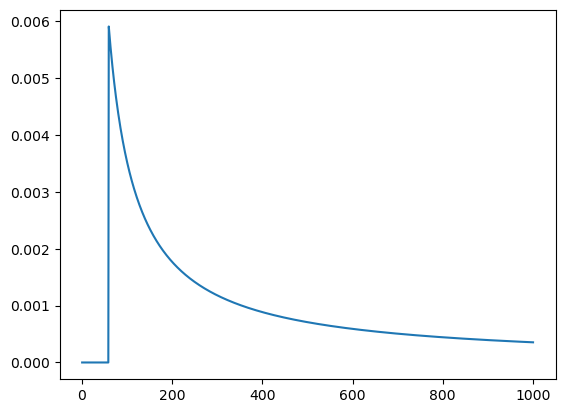

In [11]:
plt.plot(x, y)

In [25]:
for upper_bound in [500, 1000, 2000]:
    print(f'Upper-bound: {upper_bound}:')
    hypos = list(range(1, upper_bound+1, 1))
    suite = TrainProblem(hypos)
    for observaion in [30, 60, 90]:
        suite.Update(observaion)
    print(f'Max-likelihood estimate: {suite.MaximumLikelihood()}\n MMSE estimate: {suite.Mean()}')

Upper-bound: 500:
Max-likelihood estimate: 90
 MMSE estimate: 151.84958795903822
Upper-bound: 1000:
Max-likelihood estimate: 90
 MMSE estimate: 164.30558642273363
Upper-bound: 2000:
Max-likelihood estimate: 90
 MMSE estimate: 171.33818109150937


This naive solution is senstitive to upper bound (you can try what happens if upper bound is 500 or 10000) - this is not good. We need to obsere more data or come up with beter prior.

**Better solution**

the distribution of company sizes tends to follow a power law, as Robert Axtell reports in Science (see http://www.sciencemag.org/content/293/5536/1818.full.pdf).


In [20]:
class TrainProblem2(Suite):
    def __init__(self, hypos, alpha=1.0):
        Suite.__init__(self)
        for H in hypos:
            self.Set(H, H**(-alpha))
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [26]:
for upper_bound in [500, 1000, 2000]:
    print(f'Upper-bound: {upper_bound}:')
    hypos = list(range(1, upper_bound+1, 1))
    suite = TrainProblem2(hypos)
    for observaion in [30, 60, 90]:
        suite.Update(observaion)
    print(f'Max-likelihood estimate: {suite.MaximumLikelihood()}\n MMSE estimate: {suite.Mean()}')

Upper-bound: 500:
Max-likelihood estimate: 90
 MMSE estimate: 130.70846986256004
Upper-bound: 1000:
Max-likelihood estimate: 90
 MMSE estimate: 133.2752313750312
Upper-bound: 2000:
Max-likelihood estimate: 90
 MMSE estimate: 133.99746308073065


We see that this is much more sable solution which converges to 134

**Constructing an interval**

90% Confidence interval:
 * Value at 5% and 95% probabiliy from CDF

prob = (1 - percentage / 100.0) / 2

interval = self.Value(prob), self.Value(1 - prob)

In [27]:
suite.CredibleInterval()

(91, 243)